# REAL ESTATE PRICE PREDICTOR


In [1]:
import pandas as pd


In [2]:
housing = pd.read_csv("housingdata.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PITRATIO,B,LSAT,MEDV
0,0.03359,75.0,2.95,0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
1,0.12744,0.0,6.91,0,0.448,6.770,2.9,5.7209,3,233,17.9,385.41,4.84,26.6
2,0.14150,0.0,6.91,0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81,25.3
3,0.15936,0.0,6.91,0,0.448,6.211,6.5,5.7209,3,233,17.9,394.46,7.44,24.7
4,0.12269,0.0,6.91,0,0.448,6.069,40.0,5.7209,3,233,17.9,389.39,9.55,21.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      466 non-null    float64
 1   ZN        466 non-null    float64
 2   INDUS     466 non-null    float64
 3   CHAS      466 non-null    int64  
 4   NOX       466 non-null    float64
 5   RM        461 non-null    float64
 6   AGE       466 non-null    float64
 7   DIS       466 non-null    float64
 8   RAID      466 non-null    int64  
 9   TAX       466 non-null    int64  
 10  PITRATIO  466 non-null    float64
 11  B         466 non-null    float64
 12  LSAT      466 non-null    float64
 13  MEDV      466 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 51.1 KB


In [5]:
housing['CHAS'].value_counts()

0    431
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PITRATIO,B,LSAT,MEDV
count,466.000000,466.000000,466.000000,466.000000,466.000000,461.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,3.874544,11.951717,11.483391,0.075107,0.557720,6.302722,68.110730,3.719791,10.025751,418.075107,18.386266,355.120644,12.579592,22.744421
std,8.914454,23.936348,7.019696,0.263848,0.119969,0.723465,28.535649,2.162066,8.910268,171.924592,2.142670,94.255829,7.206599,9.392574
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.130000,0.000000,0.448000,5.887000,42.950000,2.026525,4.000000,277.000000,17.075000,374.710000,6.877500,17.200000
50%,0.252775,0.000000,10.010000,0.000000,0.544000,6.229000,76.800000,2.893550,5.000000,364.000000,18.900000,391.440000,11.110000,21.450000
75%,4.326920,20.000000,18.100000,0.000000,0.647000,6.642000,93.975000,5.118000,24.000000,666.000000,20.200000,396.237500,16.860000,25.175000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAID'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PITRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

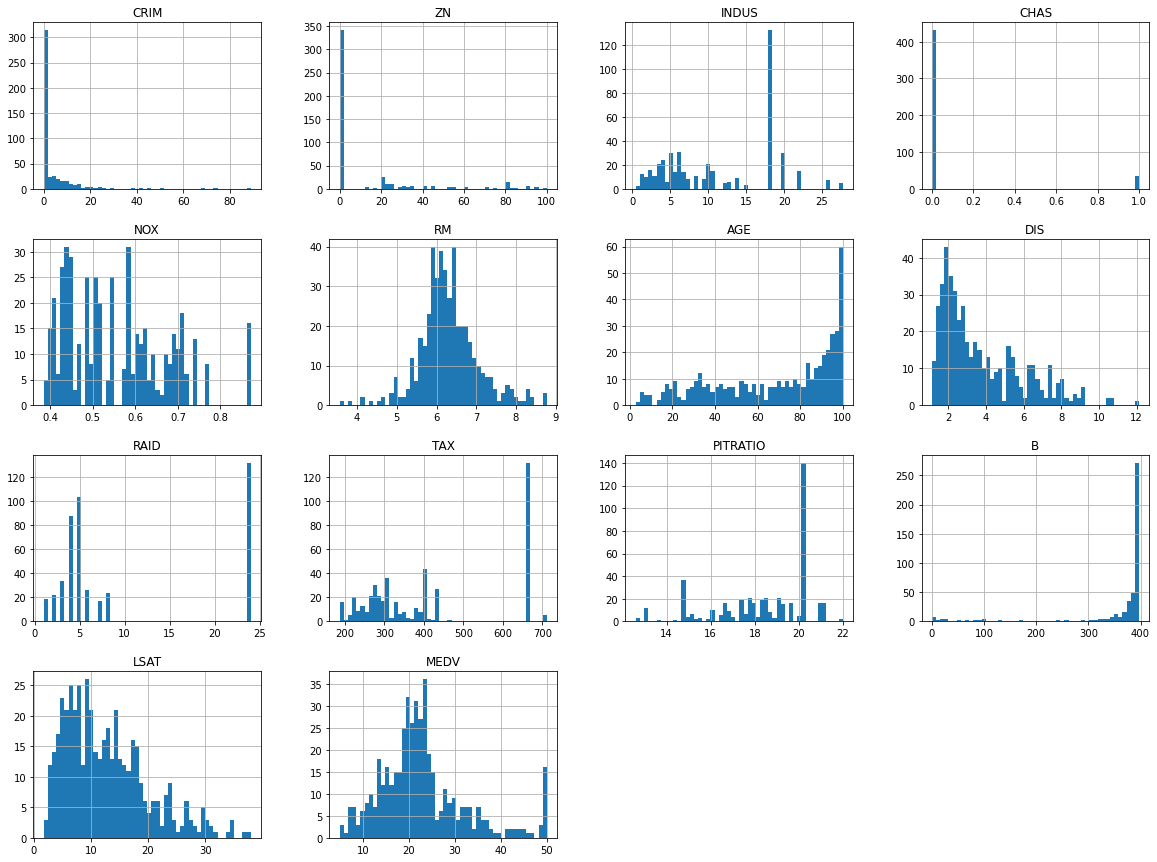

In [8]:
housing.hist(bins=50, figsize=(20,15))

## Train_ Test Spliting

In [9]:
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)* test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [10]:
train_set , test_set = split_train_test(housing, 0.2)

[ 55  63  33 461  72 332 228   9 172 229  77  73 347  82 281 266 415 287
 423  76   0  93  11 412  75 440 310 176  30 253 396 382 268  90  18  39
  79  70 131 434 101 117 132 113 416 238 294 460 403 244 453 318 126 311
 338 324  78 431 405 284 168 299 457 426 199 180 399 124 323 410  15 312
 361  19 362 393  56 274 148 446 451 391 397  25 249 211 298  42 459 321
 329 368 220 140 302  22 304  46 153 456 155 376  57 351 204  24  17  66
 447  86  31  84 320 137 196 445  94 255 193 175 437 409 388 104 231 301
   5 116  45  16 432 333   3 364  60 110 296 369  29 157 203  26   7 425
 108 305 436 118 114 290 154 422 407 355 173 245 185 417 141 341 248 414
 181 210 109 375 145 227 152 371 237  83 209 165 390 195  74 239 247 379
 119 349 277 218 454 192 261 384 358 250  36 139 340 208 401 408  59 111
 411 234   6 336 322 158 150 177 184  10 356 103  81  38 452 167 438 271
 198 275 225 222 194  89 146 163 291 147   2  92 374  69 265 123 360  96
 143 353 334 367  97 286  68  23  37 144 122 183 20

In [11]:
print(f"rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

rows in train set : 373
Rows in test set: 93



In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing,test_size=0.2,random_state=42)
print(f"rows in train set : {len(train_set)}\nRows in test set: {len(test_set)}\n")

rows in train set : 372
Rows in test set: 94



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PITRATIO,B,LSAT,MEDV
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,5.143013,9.340426,12.002660,0.074468,0.573572,6.227745,69.541489,3.456163,9.755319,415.265957,18.403191,354.138617,12.960319,21.581915
std,12.084414,18.418407,6.996555,0.263939,0.124294,0.814569,28.588096,1.932442,8.764157,171.671490,2.209484,97.492218,7.734065,9.076248
min,0.009060,0.000000,1.520000,0.000000,0.400000,3.561000,2.900000,1.321600,1.000000,188.000000,12.600000,2.520000,2.470000,5.000000
25%,0.079687,0.000000,5.860000,0.000000,0.464000,5.869250,47.300000,1.830175,4.000000,277.000000,17.450000,377.322500,6.660000,15.700000
50%,0.309400,0.000000,10.300000,0.000000,0.545500,6.249500,77.800000,2.811150,5.000000,330.000000,19.100000,392.300000,10.505000,21.350000
75%,4.285942,20.000000,18.100000,0.000000,0.677000,6.680750,95.925000,4.363600,24.000000,666.000000,20.200000,396.900000,16.995000,25.000000
max,73.534100,90.000000,27.740000,1.000000,0.871000,8.337000,100.000000,8.055500,24.000000,711.000000,21.200000,396.900000,36.980000,50.000000


In [15]:
strat_test_set['CHAS'].value_counts()

0    87
1     7
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    344
1     28
Name: CHAS, dtype: int64

In [17]:
housing = strat_train_set.copy()

## Looking for coorelation

In [18]:
corr_matrix=housing.corr()

In [19]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV        1.000000
RM          0.697651
ZN          0.351142
B           0.324725
DIS         0.230211
CHAS        0.190825
AGE        -0.329553
CRIM       -0.379673
RAID       -0.385317
NOX        -0.399771
TAX        -0.464756
INDUS      -0.469611
PITRATIO   -0.507479
LSAT       -0.732028
Name: MEDV, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSAT'>,
        <AxesSubplot:xlabel='LSAT', ylabel='LSAT'>]], dtype=object)

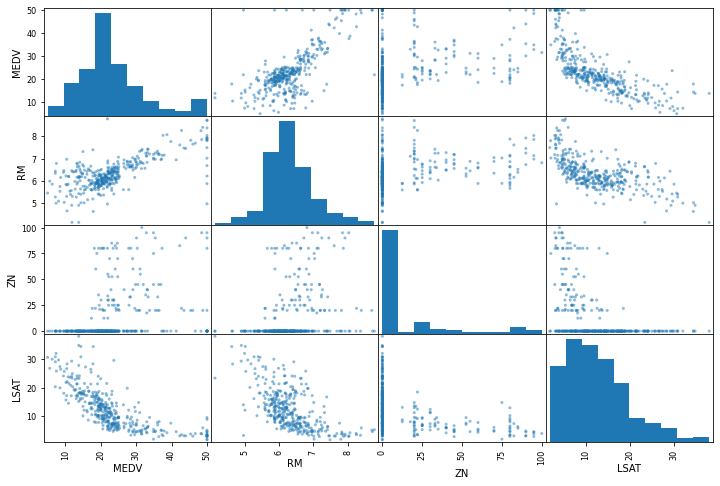

In [21]:
attributes = ["MEDV","RM","ZN","LSAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

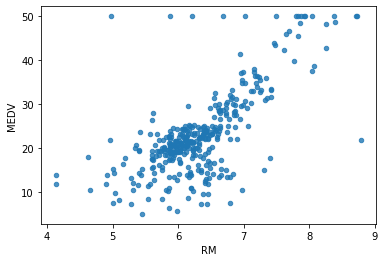

In [22]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Attribute combination

In [23]:
housing['TAXRM']=housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PITRATIO,B,LSAT,MEDV,TAXRM
428,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1,112.386095
32,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8,50.288541
308,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
355,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1,102.920723
255,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,396.90,6.27,28.6,43.276430


In [24]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV        1.000000
RM          0.697651
ZN          0.351142
B           0.324725
DIS         0.230211
CHAS        0.190825
AGE        -0.329553
CRIM       -0.379673
RAID       -0.385317
NOX        -0.399771
TAX        -0.464756
INDUS      -0.469611
PITRATIO   -0.507479
TAXRM      -0.544555
LSAT       -0.732028
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

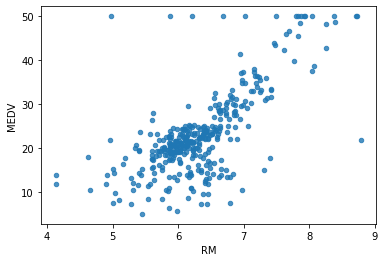

In [25]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)


In [26]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## missing attributes

In [27]:
a = housing.dropna(subset=['RM']) #option 1
a.shape

(367, 13)

In [28]:
housing.drop("RM",axis=1).shape #option 2

(372, 12)

In [29]:
median  = housing["RM"].median()

In [30]:
housing["RM"].fillna(median)

428    5.926
32     6.065
308    6.635
355    6.471
255    6.678
       ...  
450    5.093
264    7.236
83     5.856
411    6.655
132    5.572
Name: RM, Length: 372, dtype: float64

In [31]:
housing.shape

(372, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.40075e-01, 0.00000e+00, 1.00100e+01, 0.00000e+00, 5.32000e-01,
       6.22900e+00, 7.67000e+01, 2.90245e+00, 5.00000e+00, 3.84000e+02,
       1.88000e+01, 3.91180e+02, 1.12850e+01])

In [34]:
X = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAID,TAX,PITRATIO,B,LSAT
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,3.554017,12.611559,11.352177,0.075269,0.553715,6.320677,67.749194,3.786406,10.094086,418.784946,18.381989,355.368790,12.483387
std,7.904730,25.118003,7.028846,0.264180,0.118687,0.693513,28.549559,2.213765,8.957177,172.212171,2.128481,93.553412,7.074854
min,0.010960,0.000000,0.460000,0.000000,0.385000,4.138000,6.200000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082155,0.000000,4.930000,0.000000,0.445000,5.896250,42.375000,2.084875,4.000000,279.250000,16.975000,374.527500,6.915000
50%,0.240075,0.000000,10.010000,0.000000,0.532000,6.229000,76.700000,2.902450,5.000000,384.000000,18.800000,391.180000,11.285000
75%,4.301552,20.000000,18.100000,0.000000,0.631000,6.632000,93.650000,5.214600,24.000000,666.000000,20.200000,395.705000,16.780000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Feature Scaling

In [37]:
# primarily two types of feature scaling method 
# 1 min max scaling
# 2 standardization


## creating pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy="median")),('std_scaler',StandardScaler()),])

In [39]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [40]:
housing_num_tr

array([[ 1.52286970e+00, -5.02768650e-01,  9.61311554e-01, ...,
         8.55285829e-01,  1.43118437e-01,  7.99199175e-01],
       [-4.38603248e-01, -5.02768650e-01, -7.72399410e-02, ...,
         3.84834360e-01,  3.80414525e-01, -9.85570168e-01],
       [-4.48310500e-01,  2.68648745e+00, -1.33090978e+00, ...,
        -6.50158872e-01,  3.80735629e-01, -9.19048233e-01],
       ...,
       [-4.31162246e-01, -5.02768650e-01,  2.03690330e+00, ...,
         3.37789213e-01,  1.59922896e-01,  1.82958148e+00],
       [ 2.39054907e-01, -5.02768650e-01,  9.61311554e-01, ...,
         8.55285829e-01, -8.43330415e-04,  7.42584763e-01],
       [-4.32586095e-01, -5.02768650e-01, -1.04028632e+00, ...,
        -8.38339459e-01,  4.44528353e-01,  3.12315231e-01]])

## selecting a desired model for Real Estate

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [42]:
some_data = housing.iloc[:5]

In [43]:
some_labels = housing_labels.iloc[:5] 

In [44]:
prepared_data=my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([17.489, 22.94 , 25.845, 13.421, 27.986])

In [46]:
list(some_labels)

[19.1, 22.8, 24.5, 13.1, 28.6]

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions  = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [48]:
rmse

1.198312513091746

## using better evaluation technique - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr,housing_labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([3.6474433 , 4.30425025, 6.50043545, 2.95575392, 4.08486897,
       3.77743071, 3.24445627, 2.49521489, 3.34643606, 3.00459868])

In [51]:
def print_scores(scores):
    print("Scores :",scores)
    print("Mean : ",scores.mean())
    print("Standard Deviation : ",scores.std())
    

In [52]:
print_scores(rmse)

Scores : 1.198312513091746
Mean :  1.198312513091746
Standard Deviation :  0.0


## testing the model om test data

In [57]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(Y_test))

[27.745 19.449  9.843 24.717 33.675  8.386 20.99  21.102 10.993 25.185
 32.79  45.053  8.373 35.829 38.332 20.608 22.219 13.999 20.342 18.59
  8.232 26.17  22.686 22.517 10.741 23.219 21.543 19.764 19.897 23.65
 14.913 20.772 13.402 29.78  25.641 19.49  20.246 10.998 45.423 19.407
 22.565 16.924 23.528 25.822 15.915 22.2   10.597 36.941 20.728 30.825
 15.095 31.458 29.433 17.194 14.854 10.986 19.225 15.511  9.676 17.929
 16.169 25.466 23.974  9.716 21.612 12.905  8.793 11.653 46.097 13.907
 25.518 31.975 19.934 23.497 32.996 34.107 19.221 13.807 22.18  20.056
 13.73  42.611 31.701 13.508 23.786 13.291 33.861 22.359 21.49  29.589
 19.096 33.217 14.081 24.377] [23.9, 22.5, 5.0, 24.6, 32.4, 10.2, 19.8, 11.9, 12.3, 27.0, 34.6, 43.8, 7.0, 33.3, 43.1, 23.4, 24.5, 16.7, 19.6, 20.1, 8.4, 22.8, 26.4, 22.6, 13.1, 22.9, 22.0, 19.5, 16.0, 24.4, 12.6, 20.5, 11.7, 26.6, 26.2, 17.1, 16.1, 10.9, 41.7, 18.7, 23.1, 18.0, 25.0, 36.2, 15.6, 27.5, 8.3, 35.2, 21.7, 22.8, 13.6, 31.6, 26.7, 17.0, 17.8, 12.7, 

In [54]:
final_rmse

3.093467033481048